# <center> <h3 style="background-color: lightgreen; padding: 5px; text-align: center;">Appendix</h3>

# Task 1

### <center> <h3 style="background-color: pink; padding: 5px; text-align: center;">1. Select a real-world problem.</h3>

#### Problem: 
I select the medical classification problem. The problem is based on diagnosis or classification of heart stroke attack using independent variables. There are 5110 instances (more than 1800 instances) in the dataset and based on 11 independent and 1 dependent valriables. 
I download the csv dataset file from kaggle (https://www.kaggle.com/datasets).
The detail of the dataset can be obtained: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the independent variables like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
Attribute Information of the dataset is as follow:

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## <center> 1.1 Importing Python Libraries

In [1]:
import numpy as np                                # "NumPy" is a Python library used for working with arrays
import pandas as pd                               # "Pandas" is a Python library used for working with data sets
import matplotlib.pyplot as mtp                   #  one of the plotting library in python
import matplotlib.pyplot as plt                   #  one of the plotting library in python
import seaborn as sns                             #  one of the plotting library in python
from sklearn.preprocessing import LabelEncoder    # The LabelEncoder from the sklearn.preprocessing module in scikit-learn is 
                                                  # used for encoding categorical variables into numerical values. 
                                                  # It's a common preprocessing step in machine learning and data analysis. 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

### <center> <h3 style="background-color: pink; padding: 5px; text-align: center;">2. Select suitable dataset(s) for the chosen problem.</h3>

### <center> 2.1. Import the Heart Stroke Dataset (from Kaggle)  
First, I need to load the dataset into the Jupyter Notebook. I can use popular libraries like Pandas for this task.
The detail of the dataset can be obtained: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [2]:
# Read the CSV file into a Pandas DataFrame

stroke_dataset = []      # initialize variable as empty
stroke_dataset = pd.read_csv(r'C:\Users\mmasood\Desktop\Sara Work\ML Assignment\healthcare-dataset-stroke-data.csv')
stroke_dataset

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

### <center> <h3 style="background-color: pink; padding: 5px; text-align: center;">3. Analyse the dataset and pre-process it</h3>

<center> <h3 style="background-color: lightblue; padding: 5px; text-align: center;">Data Exploration Stage</h3> 

### <center> 3.1. Explore the first few rows of the "stroke_dataset" 
Use Pandas to view the first few rows of the dataset to get a sense of its structure.

In [3]:
stroke_dataset.head()  # Want to view the first few rows of the dataset

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
stroke_dataset.head(10)  # want to view the first ten rows of the datset 

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

### <center> 3.2.  Data Summary Statistics
Generate summary statistics to understand the data's central tendencies, distributions, and any potential issues.

In [5]:
stroke_dataset.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

### <center> 3.3. Explore Data types, and the presence of missing values 

In [6]:
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Data types
stroke_dataset.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# Missing values
stroke_dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#Checking Categorical Variables data distribution

print(stroke_dataset['gender'].value_counts(normalize=True)*100)
print() # Insert a line break
print() # Insert a line break
print(stroke_dataset['ever_married'].value_counts(normalize=True)*100)
print() # Insert a line break 
print() # Insert a line break
print(stroke_dataset['work_type'].value_counts(normalize=True)*100)
print() # Insert a line break
print() # Insert a line break
print(stroke_dataset['smoking_status'].value_counts(normalize=True)*100)

Female    58.590998
Male      41.389432
Other      0.019569
Name: gender, dtype: float64


Yes    65.616438
No     34.383562
Name: ever_married, dtype: float64


Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: work_type, dtype: float64


never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: smoking_status, dtype: float64


In [10]:
#Checking Target Class variable is balanced or not

print(stroke_dataset['stroke'].value_counts(normalize=True)*100)

0    95.127202
1     4.872798
Name: stroke, dtype: float64


In [11]:
stroke_dataset['stroke'].unique()

array([1, 0], dtype=int64)

### <center> 3.4. Identify the Number of Columns and Rows in the stroke_dataset 

In [12]:
# Count rows and columns in the "stroke_dataset"
num_rows, num_columns = stroke_dataset.shape

display(f"Number of rows: {num_rows}")
display(f"Number of columns: {num_columns}")

'Number of rows: 5110'

'Number of columns: 12'

### <center> 3.5. Check the Nan and None Values (in each column) of the stroke_dataset

In [13]:
# Check for NaN values in the DataFrame
nan_values = []
nan_values = stroke_dataset.isna().sum()

# Alternatively, we can use stroke_dataset.isnull().sum() to achieve the same result
# nan_values = stroke_dataset.isnull().sum()

print("NaN values in each column of the stroke_dataset:")
print(nan_values)

NaN values in each column of the stroke_dataset:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### <center> 3.6. Check the Unique values/items in each column of the stroke_dataset

In [14]:
# Get unique values in the 'Name' column
unique_items_gender = []
unique_items_gender = stroke_dataset['gender'].unique()

print("Unique values in the 'gender' column:")
pd.DataFrame(unique_items_gender)   # convert the array into dataframe and display it

Unique values in the 'gender' column:


0
0    Male
1  Female
2   Other

In [15]:
# Get unique values in the 'Name' column
unique_items_smoking_status = []
unique_items_smoking_status = stroke_dataset['smoking_status'].unique()



# want to full rows of the dataframe
#pd.set_option('display.max_rows', None)

# reset caommand
#pd.reset_option('display.max_rows', None)


print("Unique values in the 'smoking_status' column:")
pd.DataFrame(unique_items_smoking_status)         # convert the array into dataframe and display it


Unique values in the 'smoking_status' column:


0
0  formerly smoked
1     never smoked
2           smokes
3          Unknown

In [16]:
# Get unique values in the 'Name' column
unique_items_work_type = []
unique_items_work_type = stroke_dataset['work_type'].unique()



# want to full rows of the dataframe
#pd.set_option('display.max_rows', None)

# reset caommand
#pd.reset_option('display.max_rows', None)


print("Unique values in the 'work_type' column:")
pd.DataFrame(unique_items_work_type)         # convert the array into dataframe and display it

Unique values in the 'work_type' column:


0
0        Private
1  Self-employed
2       Govt_job
3       children
4   Never_worked

### <center> 3.7. Summary of all Nan and Unique counts in each column of the "stroke_dataset" 

In [17]:
# Create dictionaries to store unique counts, row counts, NaN counts, and empty counts
unique_counts = {}
row_counts = {}
nan_counts = {}
empty_counts = {}

# Loop through columns and count unique items, row counts, NaN counts, and empty counts
for column in stroke_dataset.columns:
    unique_count = stroke_dataset[column].nunique()
    row_count = len(stroke_dataset[column])
    nan_count = stroke_dataset[column].isna().sum()  # Count NaN values
    empty_count = stroke_dataset[column].eq('').sum()  # Count empty string values

    unique_counts[column] = [unique_count]
    row_counts[column] = [row_count]
    nan_counts[column] = [nan_count]
    empty_counts[column] = [empty_count]

# Create DataFrames from the dictionaries
unique_counts2 = []
row_counts2 = []
nan_counts2 = []
empty_counts2 = []

unique_counts2 = pd.DataFrame(unique_counts, index=['Unique Count'])
row_counts2 = pd.DataFrame(row_counts, index=['Row Count'])
nan_counts2 = pd.DataFrame(nan_counts, index=['NaN Count'])
empty_counts2 = pd.DataFrame(empty_counts, index=['Empty Count'])

# Concatenate the DataFrames
result= []
result = pd.concat([unique_counts2, row_counts2, nan_counts2, empty_counts2])

# Display the combined DataFrame
print("Heart Stroke DataFrame:")
display(result)

Heart Stroke DataFrame:


id  gender   age  hypertension  heart_disease  ever_married  \
Unique Count  5110       3   104             2              2             2   
Row Count     5110    5110  5110          5110           5110          5110   
NaN Count        0       0     0             0              0             0   
Empty Count      0       0     0             0              0             0   

              work_type  Residence_type  avg_glucose_level   bmi  \
Unique Count          5               2               3979   418   
Row Count          5110            5110               5110  5110   
NaN Count             0               0                  0   201   
Empty Count           0               0                  0     0   

              smoking_status  stroke  
Unique Count               4       2  
Row Count               5110    5110  
NaN Count                  0       0  
Empty Count                0       0

### <center> 3.8. Display the Columns Names 

In [18]:
# Display column names
column_names_of_stroke_dataset = []
column_names_of_stroke_dataset = stroke_dataset.columns
pd.DataFrame(column_names_of_stroke_dataset)  # display the dataset into the form of dataframe

0
0                  id
1              gender
2                 age
3        hypertension
4       heart_disease
5        ever_married
6           work_type
7      Residence_type
8   avg_glucose_level
9                 bmi
10     smoking_status
11             stroke

### <center> 3.9. Display the Categorical and Numeric Variables in the "stroke_dataset" 

In [19]:
#Creating list for categorical and numerical variables
cat=[]
cont=[]
for i in stroke_dataset.columns:
    if stroke_dataset[i].dtype=="object":
        cat.append(i)
    else:
        cont.append(i)
print('Categorical Variables:',cat) 
print('Numeric Variables:',cont)

Categorical Variables: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Numeric Variables: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


### <center> 3.10. Plot columns as a part of Data exploration process

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

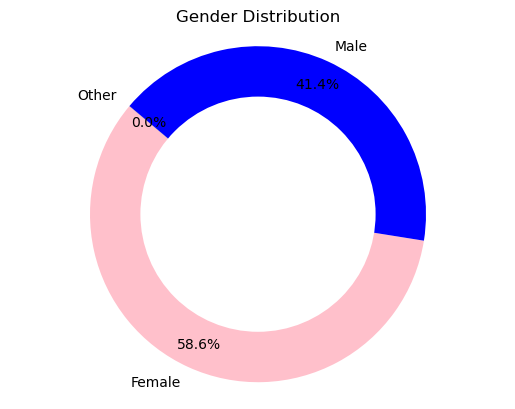

In [20]:
# Count the number of each gender category
gender_counts = stroke_dataset['gender'].value_counts()
display(gender_counts)

# Create a wheel plot
labels = gender_counts.index
sizes = gender_counts.values
colors = ['pink', 'blue', 'gray']  # Colors for Male, Female, and Others

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a circle in the center (to make it a donut plot)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Gender Distribution")

plt.show()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

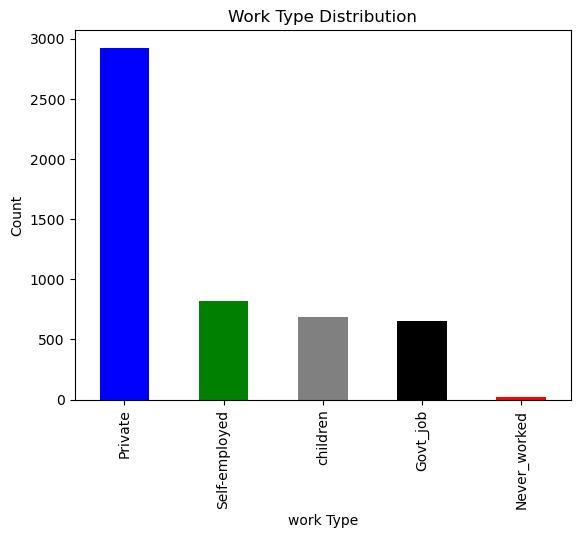

In [21]:
# Define custom colors for items in the column
colors = {'Private': 'blue', 'Self-employed': 'green', 'children': 'gray', 'Govt_job':'black','Never_worked':'red'}

# Count the number of each category
work_type_counts = stroke_dataset['work_type'].value_counts()
display(work_type_counts)

# Create a bar plot with custom colors
work_type_counts.plot(kind='bar', color=[colors.get(x, 'gray') for x in work_type_counts.index])
plt.title("Work Type Distribution")
plt.xlabel("work Type")
plt.ylabel("Count")
plt.show()

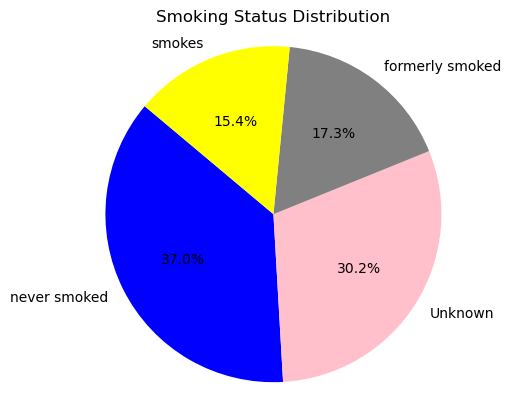

In [22]:
# Count the number of each smoking_status category
smoking_status_counts = stroke_dataset['smoking_status'].value_counts()

# Define custom colors for items in smoking_status column
colors = ['blue', 'pink', 'gray','yellow']

# Create a pie chart
plt.pie(smoking_status_counts, labels=smoking_status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title("Smoking Status Distribution")

plt.show()

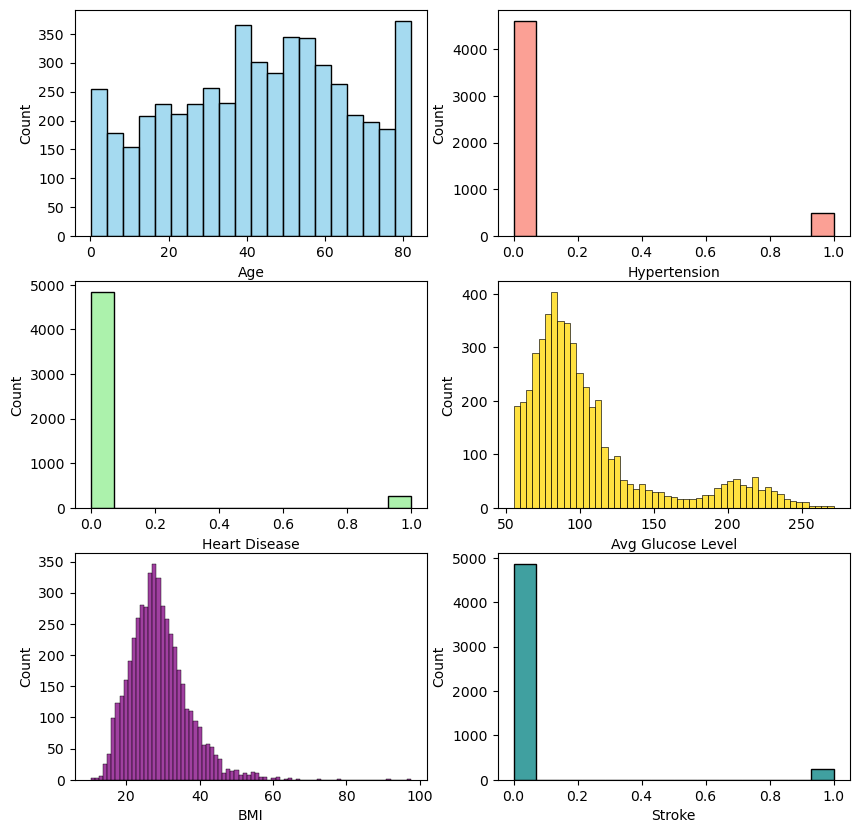

In [23]:
#Plotting the histogram for multiple features

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 10)

# Plot histograms with different colors
sns.histplot(stroke_dataset['age'], ax=axes[0][0], color='skyblue')
sns.histplot(stroke_dataset['hypertension'], ax=axes[0][1], color='salmon')
sns.histplot(stroke_dataset['heart_disease'], ax=axes[1][0], color='lightgreen')
sns.histplot(stroke_dataset['avg_glucose_level'], ax=axes[1][1], color='gold')
sns.histplot(stroke_dataset['bmi'], ax=axes[2][0], color='purple')
sns.histplot(stroke_dataset['stroke'], ax=axes[2][1], color='teal')

# Add labels and titles if needed
axes[0][0].set_xlabel('Age')
axes[0][1].set_xlabel('Hypertension')
axes[1][0].set_xlabel('Heart Disease')
axes[1][1].set_xlabel('Avg Glucose Level')
axes[2][0].set_xlabel('BMI')
axes[2][1].set_xlabel('Stroke')

plt.show()

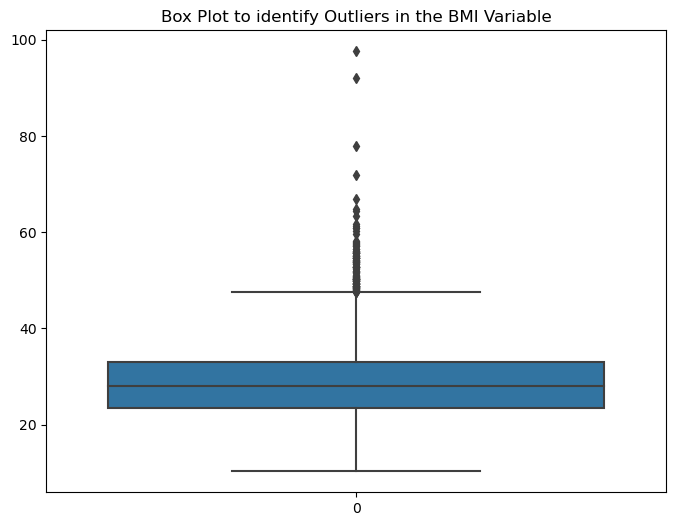

In [24]:
# Create a box plot to display outliers in the column
plt.figure(figsize=(8, 6))
sns.boxplot(stroke_dataset['bmi'])
plt.title('Box Plot to identify Outliers in the BMI Variable')
plt.show()

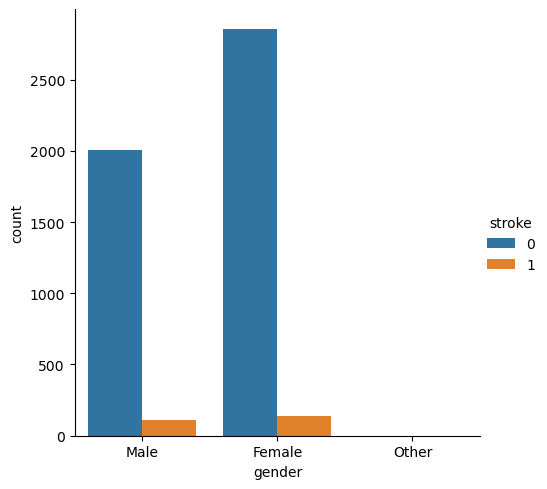

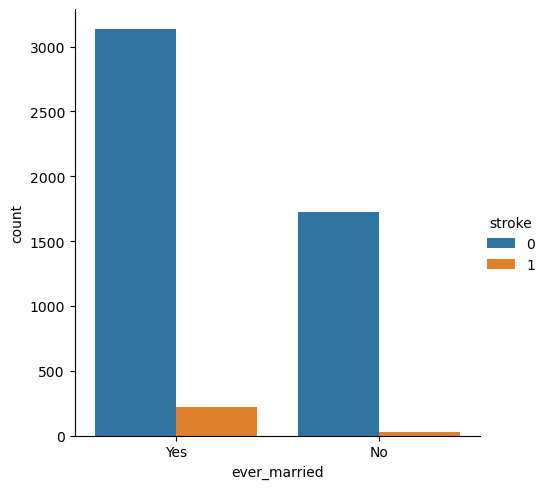

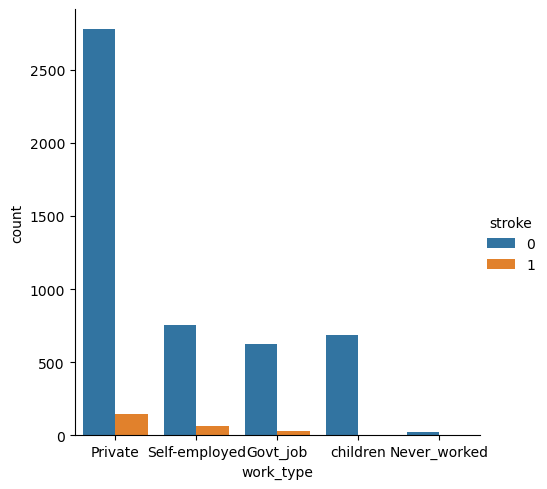

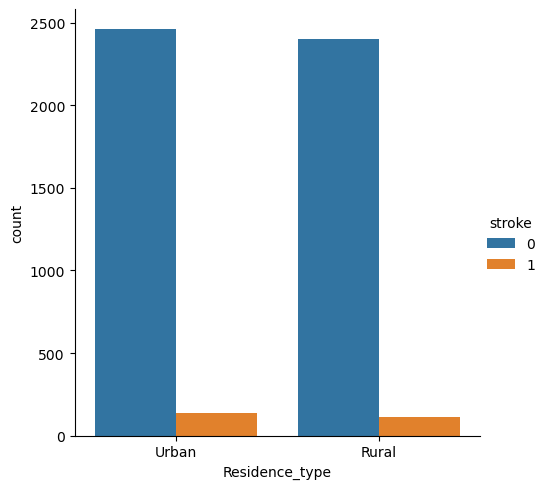

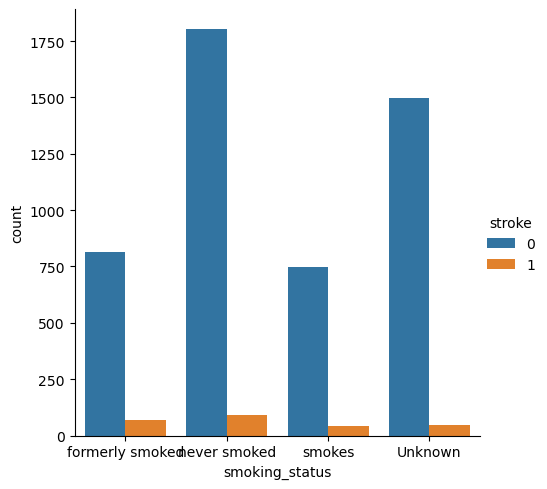

In [25]:

# Categorical plot presentation
sns.catplot(x="gender", hue="stroke", data=stroke_dataset, kind="count")
sns.catplot(x="ever_married", hue="stroke", data=stroke_dataset, kind="count")
sns.catplot(x="work_type", hue="stroke", data=stroke_dataset, kind="count")
sns.catplot(x="Residence_type", hue="stroke", data=stroke_dataset, kind="count")
sns.catplot(x="smoking_status", hue="stroke", data=stroke_dataset, kind="count")


 <center> <h3 style="background-color: lightblue; padding: 5px; text-align: center;">Data Pre-processing Stage</h3>

### <center> 3.11. Handling Missing Data (Imputation)
Imputing means filling in the missing values with estimated or calculated values. This is a common approach when the missing values are considered to be missing at random and you believe you can reasonably estimate them.

Mean, Median, or Mode Imputation: Replace the missing values with the mean, median, or mode of the "bmi" column. This is often used when the column has a roughly normal distribution.

In [26]:
# show the Nan values in red color under "bmi" variable in "stroke_dataset"

stroke_dataset.style.applymap(lambda cell: 'color:red' if pd.isnull(cell) else '')

In [27]:
# Extract rows with NaN values in the "bmi" column
nan_bmi_rows = []
nan_bmi_rows = stroke_dataset[stroke_dataset['bmi'].isna()]

# Display the rows with 201 NaN values in the "bmi" column - total 201 rows
nan_bmi_rows.style.highlight_null('red')

In [28]:
#Filling the NaN values with mean values of BMI - Imputation
stroke_dataset['bmi'].fillna(stroke_dataset['bmi'].mean(),inplace=True)
stroke_dataset

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-employed          Rural             202.21  28.893237   
2           Private          Rural             105.92  32.500000   
3           Private          Urban             171.23  34.400000   
4     Self-employed          Rural             174.12  24.000000   
...             ...            ...                ...        ...   
5105        Private          Urban              83.75  28.893237   
5106  Self-employed          Urban             125.20  40.000000   
5107  Self-employed          Rural              82.99  30.600000   
5108        Private          Rural             166.29  25.600000   
5109       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke  
0     formerly smoked       1  
1        never smoked       1  
2        never smoked       1  
3              smokes       1  
4        never smoked       1  
...               ...     ...  
5105     never smoked       0  
5106     never smoked       0  
5107     never smoked       0  
5108  formerly smoked       0  
5109          Unknown       0  

[5110 rows x 12 columns]

In [29]:
# Check for NaN values in the DataFrame
nan_values = []
nan_values = stroke_dataset.isna().sum()

# Alternatively, we can use stroke_dataset.isnull().sum() to achieve the same result
# nan_values = stroke_dataset.isnull().sum()

print("NaN values in each column of the stroke_dataset:")
print(nan_values)

NaN values in each column of the stroke_dataset:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### <center> 3.12. Drop extra or unusable or Irrelevant Variable from the "stroke_dataset"

In [30]:
#removing the extra column which is not required for analysis
stroke_dataset.drop(['id'], axis=1, inplace=True)
stroke_dataset

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0             Urban             228.69  36.600000  formerly smoked       1  
1             Rural             202.21  28.893237     never smoked       1  
2             Rural             105.92  32.500000     never smoked       1  
3             Urban             171.23  34.400000           smokes       1  
4             Rural             174.12  24.000000     never smoked       1  
...             ...                ...        ...              ...     ...  
5105          Urban              83.75  28.893237     never smoked       0  
5106          Urban             125.20  40.000000     never smoked       0  
5107          Rural              82.99  30.600000     never smoked       0  
5108          Rural             166.29  25.600000  formerly smoked       0  
5109          Urban              85.28  26.200000          Unknown       0  

[5110 rows x 11 columns]

### <center> 3.13. Encoding of Categorical variables 
Label Encoder will be use here, as it It is used for encoding categorical variables into numerical values, which is a common preprocessing step in machine learning and data analysis. The main purpose of LabelEncoder is to convert categorical labels or strings into unique integers.
It ensures a consistent mapping of categories to integers. For example, if you have a categorical feature with values "A," "B," and "C," LabelEncoder will assign a unique integer (e.g., 0, 1, and 2) to each category and always map "A" to 0, "B" to 1, and "C" to 2, which is crucial for training and applying machine learning models.

In [31]:
le = LabelEncoder()
stroke_dataset = stroke_dataset.apply(le.fit_transform)
stroke_dataset

gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1   88             0              1             1          2   
1          0   82             0              0             1          3   
2          1  101             0              1             1          2   
3          0   70             0              0             1          2   
4          0  100             1              0             1          3   
...      ...  ...           ...            ...           ...        ...   
5105       0  101             1              0             1          2   
5106       0  102             0              0             1          3   
5107       0   56             0              0             1          3   
5108       1   72             0              0             1          2   
5109       0   65             0              0             1          0   

      Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0                  1               3850  240               1       1  
1                  0               3588  162               2       1  
2                  0               2483  199               2       1  
3                  1               3385  218               3       1  
4                  0               3394  113               2       1  
...              ...                ...  ...             ...     ...  
5105               1               1360  162               2       0  
5106               1               3030  274               2       0  
5107               0               1314  180               2       0  
5108               0               3363  129               1       0  
5109               1               1454  135               0       0  

[5110 rows x 11 columns]

### <center> 3.14. Plotting the heat map for correlation of the all variables in the "stroke_dataset" 
    
"Age" and "ever_married" variables have the highest correlation of 0.68
    
"bmi" and "ever_married" variables have the highest correlation of 0.35


<Axes: >

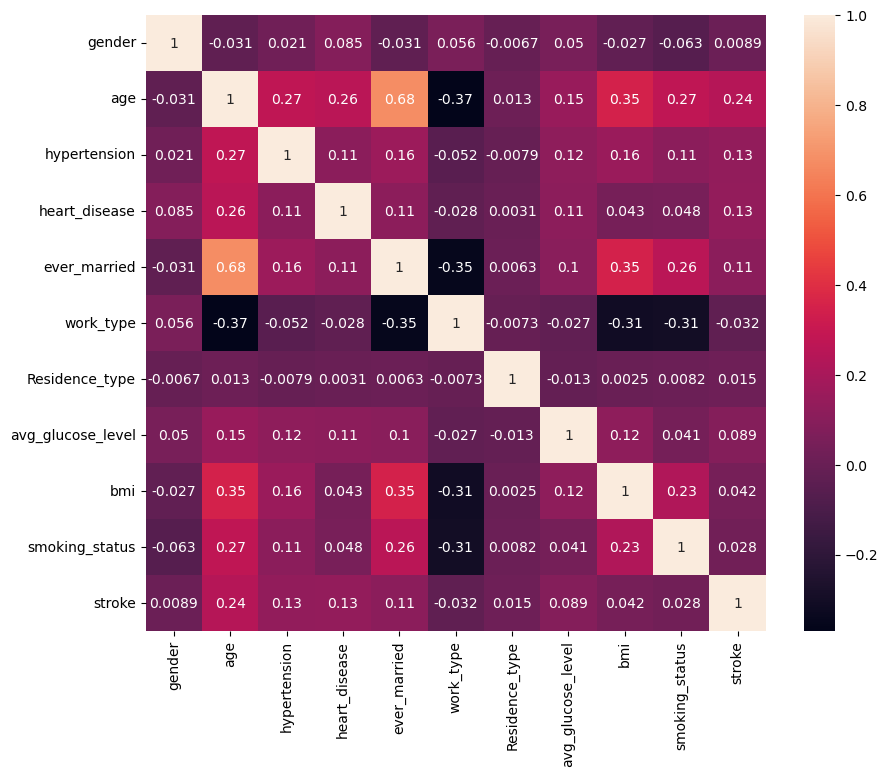

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(stroke_dataset.corr(),annot=True)

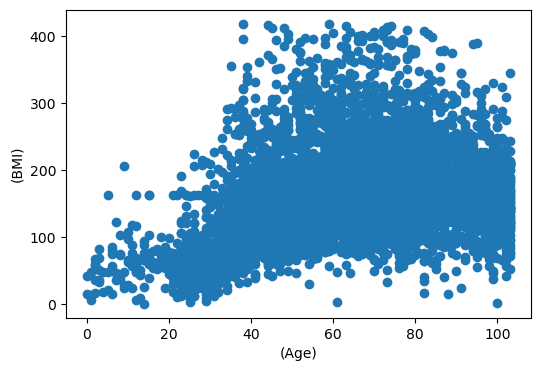

In [33]:
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(stroke_dataset['age'],stroke_dataset['bmi'])
 
# x-axis label
ax.set_xlabel('(Age)')
 
# y-axis label
ax.set_ylabel('(BMI)')
plt.show()

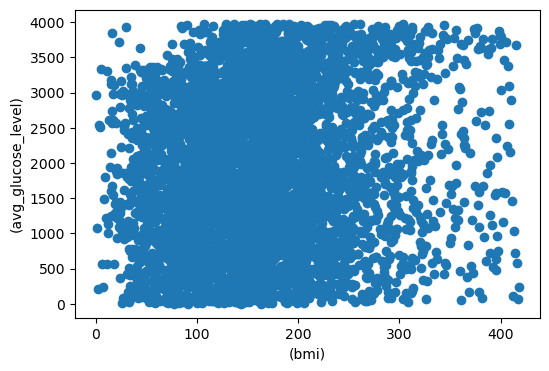

In [34]:
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(stroke_dataset['bmi'],stroke_dataset['avg_glucose_level'])
 
# x-axis label
ax.set_xlabel('(bmi)')
 
# y-axis label
ax.set_ylabel('(avg_glucose_level)')
plt.show()

### <center> 4. Machine Learning Models

### <center> 4.1 Label Encoding 

In [35]:
for column in stroke_dataset.columns:
  if stroke_dataset[column].dtype == np.int64 or stroke_dataset[column].dtype == np.float64:
    continue
  stroke_dataset[column] = LabelEncoder().fit_transform(stroke_dataset[column])


stroke_dataset

gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1   88             0              1             1          2   
1          0   82             0              0             1          3   
2          1  101             0              1             1          2   
3          0   70             0              0             1          2   
4          0  100             1              0             1          3   
...      ...  ...           ...            ...           ...        ...   
5105       0  101             1              0             1          2   
5106       0  102             0              0             1          3   
5107       0   56             0              0             1          3   
5108       1   72             0              0             1          2   
5109       0   65             0              0             1          0   

      Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0                  1               3850  240               1       1  
1                  0               3588  162               2       1  
2                  0               2483  199               2       1  
3                  1               3385  218               3       1  
4                  0               3394  113               2       1  
...              ...                ...  ...             ...     ...  
5105               1               1360  162               2       0  
5106               1               3030  274               2       0  
5107               0               1314  180               2       0  
5108               0               3363  129               1       0  
5109               1               1454  135               0       0  

[5110 rows x 11 columns]

### <center> 4.2 Splitting the stroke_dataset into dependent and independents variables

In [36]:
#Splitting dependent and independent columns
dependent_variables = []
independent_variables = []    

independent_variables = stroke_dataset.drop(columns = 'stroke')
dependent_variable = stroke_dataset['stroke']

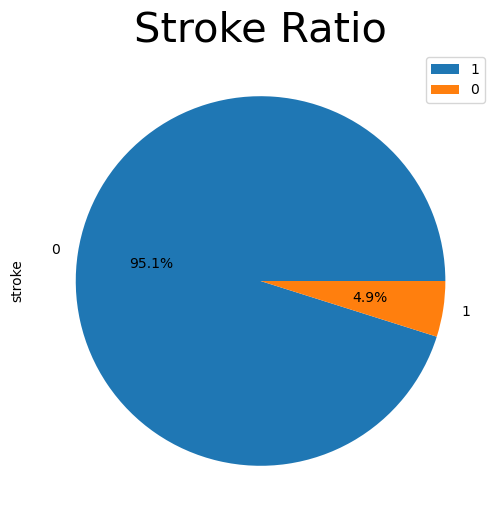

In [37]:
plt.figure(figsize=(10,6))
stroke_dataset.stroke.value_counts().plot.pie(autopct="%.1f%%")
plt.title("Stroke Ratio", fontsize = 30)
plt.legend(['1','0'])

### <center> 4.3 Splitting data into training and test sets 

In [38]:
independent_variables_train,independent_variables_test,dependent_variable_train,dependent_variable_test = train_test_split(independent_variables,dependent_variable,test_size=0.2,random_state=0)

### <center> 4.3 Apply Decision Tree Classification Model 

In [39]:
from sklearn.tree import DecisionTreeClassifier  
model_decision_classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
model_decision_classifier.fit(independent_variables_train, dependent_variable_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:

print('Decision Tree Model Accuracy: {:.4f}'.format(accuracy_score(dependent_variable_test, model_decision_classifier.predict(independent_variables_test))))


Decision Tree Model Accuracy: 0.9207


Text(0.5, 1.0, 'Confusion Matrix')

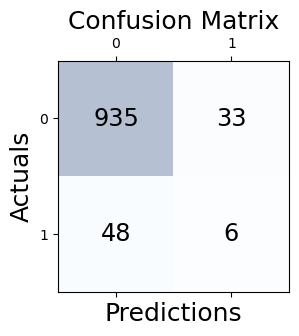

In [41]:
confusionmatrix = confusion_matrix(dependent_variable_test, model_decision_classifier.predict(independent_variables_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

### <center> 5. Logistic Reegression Classification Model 

In [42]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(independent_variables_train, dependent_variable_train)
print('Logistic Regression Model Accuracy: {:.4f}'.format(accuracy_score(dependent_variable_test, model_logistic.predict(independent_variables_test))))

Logistic Regression Model Accuracy: 0.9462


C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix')

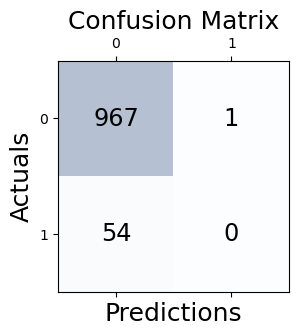

In [43]:
confusionmatrix = confusion_matrix(dependent_variable_test, model_logistic.predict(independent_variables_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

### <center> 6. Random Forest Classifier Model 

Random Forest accuracy: 0.9472


Text(0.5, 1.0, 'Confusion Matrix')

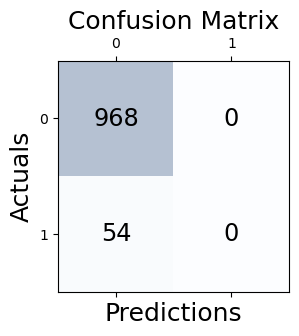

In [44]:
from sklearn.ensemble import RandomForestClassifier
model_randomforest = RandomForestClassifier()
model_randomforest.fit(independent_variables_train, dependent_variable_train)
print('Random Forest accuracy: {:.4f}'.format(accuracy_score(dependent_variable_test, model_randomforest.predict(independent_variables_test))))

confusionmatrix = confusion_matrix(dependent_variable_test, model_randomforest.predict(independent_variables_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

### <center> 7. KNN Classification Model 

KNeighborsClassifier accuracy: 0.9462


Text(0.5, 1.0, 'Confusion Matrix')

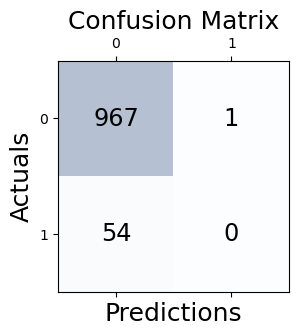

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model_knnclassfier = KNeighborsClassifier()
model_knnclassfier.fit(independent_variables_train, dependent_variable_train)

print('KNeighborsClassifier accuracy: {:.4f}'.format(accuracy_score(dependent_variable_test, model_knnclassfier.predict(independent_variables_test))))

confusionmatrix = confusion_matrix(dependent_variable_test, model_knnclassfier.predict(independent_variables_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

### <center> 8. SVM Classification Model 

SVM accuracy: 0.9472


Text(0.5, 1.0, 'Confusion Matrix')

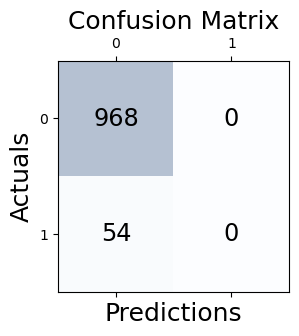

In [46]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(independent_variables_train, dependent_variable_train)
print('SVM accuracy: {:.4f}'.format(accuracy_score(dependent_variable_test, model_svm.predict(independent_variables_test))))

confusionmatrix = confusion_matrix(dependent_variable_test, model_svm.predict(independent_variables_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

### <center> 9. Neive Bayes Classification Model 

Naive Bayes Accuracy: 0.8855


Text(0.5, 1.0, 'Confusion Matrix')

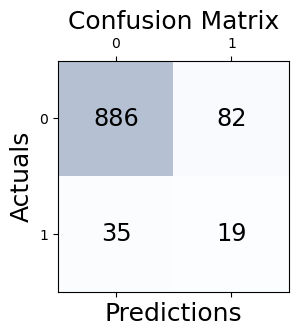

In [47]:
from sklearn.naive_bayes import GaussianNB  

model_NB_classifier = GaussianNB()  
model_NB_classifier.fit(independent_variables_train, dependent_variable_train)  
print('Naive Bayes Accuracy: {:.4f}'.format(accuracy_score(dependent_variable_test, model_NB_classifier.predict(independent_variables_test))))

confusionmatrix = confusion_matrix(dependent_variable_test, model_NB_classifier.predict(independent_variables_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

### <center> 10. Particle Swarm Optimization Algorithm  

In [48]:
c1= 2  # initialize Cognitive behavior value
c2 = 2  # initialize Social behavior value
w = 0.9  # initialize weight inertia
Particles = 5
Attributes = 10

# Initialize number of particles as Particle_Positons and thier Velocities 
from numpy import random

Particle_Positons = random.rand(Particles,Attributes)



# Initialize Particles Velocities
Velocities = random.rand(Particles,Attributes)

#print('Particle_Positons Matrix:\n',Particle_Positons,  '\nVelocities Matrix:\n',Velocities) 



Initial_iteration = 1
Max_No_Iteration = 20
MaxIt = np.arange(Max_No_Iteration)
Optimal_values = []
Particle_Positons_dataframe = pd.DataFrame(Particle_Positons)
Particle_Positons_dataframe

0         1         2         3         4         5         6  \
0  0.132021  0.495152  0.310368  0.296981  0.735466  0.511507  0.266670   
1  0.952909  0.813321  0.192997  0.935509  0.154028  0.718872  0.210805   
2  0.097473  0.272090  0.145730  0.399459  0.310395  0.040119  0.919984   
3  0.370383  0.215028  0.561954  0.742164  0.632676  0.877105  0.988386   
4  0.713238  0.139444  0.306544  0.982172  0.342526  0.690030  0.577747   

          7         8         9  
0  0.491334  0.789440  0.549418  
1  0.588534  0.954475  0.931355  
2  0.544575  0.045042  0.003359  
3  0.277340  0.504720  0.269248  
4  0.202888  0.875986  0.812802

In [49]:
x = []
x = independent_variables
y = []
y = dependent_variable


In [50]:
store_list=[]
indexing_positions = []
b = []
storing_P = []
storing_PPP = []
P = []
PPP = []
Index_Numbers =[]



for i in range(Particles):
    Index_Numbers = np.where(Particle_Positons[i]>=0.5)
    #print('Index_Numbers:\n',Index_Numbers)
   # PP = Particle_Positons_dataframe.iloc[:,Particle_Positons[i]>=0.5].values
   # print('PP:\n',PP)
    P = x.iloc[:,Particle_Positons[i]>=0.5].values
    PPP = Particle_Positons_dataframe.iloc[:,Particle_Positons[i]>=0.5].values
    #print('P:\n',P)
    #print('PPP:\n',PPP)
    indexing_positions.append(Index_Numbers)
    storing_P.append(P)
    storing_PPP.append(PPP)
#print('Final Index List:\n',indexing_positions)
#print('Final Index Values List:\n',storing_P)




storing_P[0]
storing_P_0 = pd.DataFrame(storing_P[0])
#print('P[0]:\n',storing_P_0)
#storing_P_0
storing_PPP[0]
storing_PPP_0 = pd.DataFrame(storing_PPP[0])
#print('PPP[0]:\n',storing_PPP_0)
#storing_PPP_0
ff = []
TT = []
storing_PPP_0 = np.array(storing_PPP_0)
ff = np.vstack((storing_PPP_0, storing_PPP_0,storing_PPP_0, storing_PPP_0,storing_PPP_0, storing_PPP_0))
TT = np.vstack((ff,ff,ff,ff,ff,ff,ff,ff,ff))
storing_PPP_0 = np.vstack((TT,TT,ff))
storing_PPP_0 = pd.DataFrame(storing_PPP_0)
storing_PPP_0.drop(storing_PPP_0.index[569], inplace=True)
storing_PPP_0
x0 = []
x0 = storing_P_0 * storing_PPP_0





storing_P[1]
storing_P_1 = pd.DataFrame(storing_P[1])
#print('P[1]:\n',storing_P_1)
#storing_P_1
storing_PPP[1]
storing_PPP_1 = pd.DataFrame(storing_PPP[1])
#print('PPP[1]:\n',storing_PPP_1)
#storing_PPP_1
ff = []
TT = []
storing_PPP_1 = np.array(storing_PPP_1)
ff = np.vstack((storing_PPP_1, storing_PPP_1,storing_PPP_1, storing_PPP_1,storing_PPP_1, storing_PPP_1))
TT = np.vstack((ff,ff,ff,ff,ff,ff,ff,ff,ff))
storing_PPP_1 = np.vstack((TT,TT,ff))
storing_PPP_1 = pd.DataFrame(storing_PPP_1)
storing_PPP_1.drop(storing_PPP_1.index[569], inplace=True)
storing_PPP_1
x1 = []
x1 = storing_P_1 * storing_PPP_1






storing_P[2]
storing_P_2 = pd.DataFrame(storing_P[2])
#print('P[2]:\n',storing_P_2)
#storing_P_2
storing_PPP[2]
storing_PPP_2 = pd.DataFrame(storing_PPP[2])
#print('PPP[2]:\n',storing_PPP_2)
#storing_PPP_2
ff = []
TT = []
storing_PPP_2 = np.array(storing_PPP_2)
ff = np.vstack((storing_PPP_2, storing_PPP_2,storing_PPP_2, storing_PPP_2,storing_PPP_2, storing_PPP_2))
TT = np.vstack((ff,ff,ff,ff,ff,ff,ff,ff,ff))
storing_PPP_2 = np.vstack((TT,TT,ff))
storing_PPP_2 = pd.DataFrame(storing_PPP_2)
storing_PPP_2.drop(storing_PPP_2.index[569], inplace=True)
storing_PPP_2
x2 = []
x2 = storing_P_2 * storing_PPP_2







storing_P[3]
storing_P_3 = pd.DataFrame(storing_P[3])
#print('P[3]:\n',storing_P_3)
#storing_P_3
storing_PPP[3]
storing_PPP_3 = pd.DataFrame(storing_PPP[3])
#print('PPP[3]:\n',storing_PPP_3)
#storing_PPP_3
ff = []
TT = []
storing_PPP_3 = np.array(storing_PPP_3)
ff = np.vstack((storing_PPP_3, storing_PPP_3,storing_PPP_3, storing_PPP_3,storing_PPP_3, storing_PPP_3))
TT = np.vstack((ff,ff,ff,ff,ff,ff,ff,ff,ff))
storing_PPP_3 = np.vstack((TT,TT,ff))
storing_PPP_3 = pd.DataFrame(storing_PPP_3)
storing_PPP_3.drop(storing_PPP_3.index[569], inplace=True)
storing_PPP_3
x3 = []
x3 = storing_P_3 * storing_PPP_3





storing_P[4]
storing_P_4 = pd.DataFrame(storing_P[4])
#print('P[4]:\n',storing_P_4)
#storing_P_4
storing_PPP[4]
storing_PPP_4 = pd.DataFrame(storing_PPP[4])
#print('PPP[4]:\n',storing_PPP_4)
#storing_PPP_4
ff = []
TT = []
storing_PPP_4 = np.array(storing_PPP_4)
ff = np.vstack((storing_PPP_4, storing_PPP_4,storing_PPP_4, storing_PPP_4,storing_PPP_4, storing_PPP_4))
TT = np.vstack((ff,ff,ff,ff,ff,ff,ff,ff,ff))
storing_PPP_4 = np.vstack((TT,TT,ff))
storing_PPP_4 = pd.DataFrame(storing_PPP_4)
storing_PPP_4.drop(storing_PPP_4.index[569], inplace=True)
storing_PPP_4
x4 = []
x4 = storing_P_4 * storing_PPP_4


x0.fillna(x0.mean(),inplace=True)
x1.fillna(x1.mean(),inplace=True)
x2.fillna(x2.mean(),inplace=True)
x3.fillna(x3.mean(),inplace=True)
x4.fillna(x4.mean(),inplace=True)

In [51]:
#Splitting data into training and test sets


x0_train = []
x1_train = []
x2_train = []
x3_train = []
x4_train = []
    
x0_test = []
x1_test = []
x2_test = []
x3_test = []
x4_test = []
    
y_train = []
y_test = []



x0_train,x0_test,y_train,y_test = train_test_split(x0,y,test_size=0.2,random_state=0)


x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=0)


x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=0)


x3_train,x3_test,y_train,y_test = train_test_split(x3,y,test_size=0.2,random_state=0)


x4_train,x4_test,y_train,y_test = train_test_split(x4,y,test_size=0.2,random_state=0)

In [52]:
model_logistic_x0 = []
model_logistic_x1 = []
model_logistic_x2 = []
model_logistic_x3 = []
model_logistic_x4 = []



model_logistic_x0 = LogisticRegression()
model_logistic_x0.fit(x0_train, y_train)
#print('Logistic Regression Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x0.predict(x0_test))))



model_logistic_x1 = LogisticRegression()
model_logistic_x1.fit(x1_train, y_train)
#print('Logistic Regression Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x1.predict(x1_test))))



model_logistic_x2 = LogisticRegression()
model_logistic_x2.fit(x2_train, y_train)
#print('Logistic Regression Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x2.predict(x2_test))))



model_logistic_x3 = LogisticRegression()
model_logistic_x3.fit(x3_train, y_train)
#print('Logistic Regression Model Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x3.predict(x3_test))))



model_logistic_x4 = LogisticRegression()
model_logistic_x4.fit(x4_train, y_train)
#print('Logistic Regression Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x4.predict(x4_test))))



F_old = np.array([[accuracy_score(y_test, model_logistic_x0.predict(x0_test))],[accuracy_score(y_test, model_logistic_x1.predict(x1_test))],[accuracy_score(y_test, model_logistic_x2.predict(x2_test))],[accuracy_score(y_test, model_logistic_x3.predict(x3_test))],[accuracy_score(y_test, model_logistic_x4.predict(x4_test))]])
#print('Fitness Function OLD:\n',F_old)


C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [53]:
# Chooseing the particle with best fitness value as Accuracy

Max_Value_Fitness_Function_Old = []   
indexOfMaximum = []


Max_Value_Fitness_Function_Old = np.max(F_old)
#print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old)

indexOfMaximum = np.argmax(F_old)
#print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum)

#indexOfMax = F_old.index(Max_Value_Fitness_Function_Old)
#print('Index Of Optimal Value:\n',indexOfMax)

P_best = Particle_Positons
#print('Initial Particles Best Positions:\n',P_best)

#P_best_Transpose = P_best.T

G_best = P_best[indexOfMaximum]
#print('Global Best Position:\n',G_best)

In [54]:
while Initial_iteration <= Max_No_Iteration:
    
    


    r1 = random.rand(1,Attributes)
    r1 = r1.flatten()
    r2 = random.rand(1,Attributes)
    r2 = r2.flatten()
    #print('r1 Value:\n',r1, '\nr2 Value:\n',r2)
    
    Velocities_update = []
    Velocities_New = []
    for row in range(Particles):
        Velocities_update = w * Velocities [row] + c1 * r1 * (P_best [row] - Particle_Positons [row]) + c2 * r2 * (G_best - Particle_Positons [row])
        Velocities_New.append(Velocities_update)
        
    Velocities = Velocities_New
    
    Particle_Positons_update = []
    Particle_Positons_New = []
    for row in range((Particles)):
        Particle_Positons_update = Velocities_New [row] +  Particle_Positons [row]
        Particle_Positons_New.append(Particle_Positons_update)
        #print('Velocities New:\n',Velocities_New, '\nParticle_Positons_New:\n',Particle_Positons_New)

    #######################################################################
    ####### Update Fitness Function with Updated Positions ##################
    ##########################################################################

    

    store_list=[]
    indexing_positions = []
    b = []
    storing_P = []
    storing_PPP = []
    Index_Numbers = []
    P = []
    PPP = []
    Particle_Positons_dataframe_New = []
    Particle_Positons_dataframe_New = pd.DataFrame(Particle_Positons_New) 
    
    
    
    for i in range(Particles):
        Index_Numbers = np.where(Particle_Positons_New[i]>=0.5)
        #print('Index_Numbers:\n',Index_Numbers)
        # PP = Particle_Positons_dataframe.iloc[:,Particle_Positons[i]>=0.5].values
        # print('PP:\n',PP)
        P = x.iloc[:,Particle_Positons_New[i]>=0.5].values
        PPP = Particle_Positons_dataframe_New.iloc[:,Particle_Positons_New[i]>=0.5].values
        #print('P:\n',P)
        #print('PPP:\n',PPP)
        indexing_positions.append(Index_Numbers)
        storing_P.append(P)
        storing_PPP.append(PPP)
        #print('Final Index List:\n',indexing_positions)
        #print('Final Index Values List:\n',storing_P)




    storing_P[0]
    storing_P_0 = pd.DataFrame(storing_P[0])
    #print('P[0]:\n',storing_P_0)
    #storing_P_0
    storing_PPP[0]
    storing_PPP_0 = pd.DataFrame(storing_PPP[0])
    #print('PPP[0]:\n',storing_PPP_0)
    #storing_PPP_0
    ff = []
    TT = []
    storing_PPP_0 = np.array(storing_PPP_0)
    ff = np.vstack((storing_PPP_0, storing_PPP_0,storing_PPP_0, storing_PPP_0,storing_PPP_0, storing_PPP_0))
    TT = np.vstack((ff,ff,ff,ff,ff,ff,ff,ff,ff))
    storing_PPP_0 = np.vstack((TT,TT,ff))
    storing_PPP_0 = pd.DataFrame(storing_PPP_0)
    storing_PPP_0.drop(storing_PPP_0.index[569], inplace=True)
    storing_PPP_0
    x0 = []
    x0 = storing_P_0 * storing_PPP_0





    storing_P[1]
    storing_P_1 = pd.DataFrame(storing_P[1])
    #print('P[1]:\n',storing_P_1)
    #storing_P_1
    storing_PPP[1]
    storing_PPP_1 = pd.DataFrame(storing_PPP[1])
    #print('PPP[1]:\n',storing_PPP_1)
    #storing_PPP_1
    ff = []
    TT = []
    storing_PPP_1 = np.array(storing_PPP_1)
    ff = np.vstack((storing_PPP_1, storing_PPP_1,storing_PPP_1, storing_PPP_1,storing_PPP_1, storing_PPP_1))
    TT = np.vstack((ff,ff,ff,ff,ff,ff,ff,ff,ff))
    storing_PPP_1 = np.vstack((TT,TT,ff))
    storing_PPP_1 = pd.DataFrame(storing_PPP_1)
    storing_PPP_1.drop(storing_PPP_1.index[569], inplace=True)
    storing_PPP_1
    x1 = []
    x1 = storing_P_1 * storing_PPP_1






    storing_P[2]
    storing_P_2 = pd.DataFrame(storing_P[2])
    #print('P[2]:\n',storing_P_2)
    #storing_P_2
    storing_PPP[2]
    storing_PPP_2 = pd.DataFrame(storing_PPP[2])
    #print('PPP[2]:\n',storing_PPP_2)
    #storing_PPP_2
    ff = []
    TT = []
    storing_PPP_2 = np.array(storing_PPP_2)
    ff = np.vstack((storing_PPP_2, storing_PPP_2,storing_PPP_2, storing_PPP_2,storing_PPP_2, storing_PPP_2))
    TT = np.vstack((ff,ff,ff,ff,ff,ff,ff,ff,ff))
    storing_PPP_2 = np.vstack((TT,TT,ff))
    storing_PPP_2 = pd.DataFrame(storing_PPP_2)
    storing_PPP_2.drop(storing_PPP_2.index[569], inplace=True)
    storing_PPP_2
    x2 = []
    x2 = storing_P_2 * storing_PPP_2







    storing_P[3]
    storing_P_3 = pd.DataFrame(storing_P[3])
    #print('P[3]:\n',storing_P_3)
    #storing_P_3
    storing_PPP[3]
    storing_PPP_3 = pd.DataFrame(storing_PPP[3])
    #print('PPP[3]:\n',storing_PPP_3)
    #storing_PPP_3
    ff = []
    TT = []
    storing_PPP_3 = np.array(storing_PPP_3)
    ff = np.vstack((storing_PPP_3, storing_PPP_3,storing_PPP_3, storing_PPP_3,storing_PPP_3, storing_PPP_3))
    TT = np.vstack((ff,ff,ff,ff,ff,ff,ff,ff,ff))
    storing_PPP_3 = np.vstack((TT,TT,ff))
    storing_PPP_3 = pd.DataFrame(storing_PPP_3)
    storing_PPP_3.drop(storing_PPP_3.index[569], inplace=True)
    storing_PPP_3
    x3 = []
    x3 = storing_P_3 * storing_PPP_3





    storing_P[4]
    storing_P_4 = pd.DataFrame(storing_P[4])
    #print('P[4]:\n',storing_P_4)
    #storing_P_4
    storing_PPP[4]
    storing_PPP_4 = pd.DataFrame(storing_PPP[4])
    #print('PPP[4]:\n',storing_PPP_4)
    #storing_PPP_4
    ff = []
    TT = []
    storing_PPP_4 = np.array(storing_PPP_4)
    ff = np.vstack((storing_PPP_4, storing_PPP_4,storing_PPP_4, storing_PPP_4,storing_PPP_4, storing_PPP_4))
    TT = np.vstack((ff,ff,ff,ff,ff,ff,ff,ff,ff))
    storing_PPP_4 = np.vstack((TT,TT,ff))
    storing_PPP_4 = pd.DataFrame(storing_PPP_4)
    storing_PPP_4.drop(storing_PPP_4.index[569], inplace=True)
    storing_PPP_4
    x4 = []
    x4 = storing_P_4 * storing_PPP_4
    
    ####################################################################################
    #####################################################################################
    ###########################################################################



####################################################################################
    #####################################################################################
    ###########################################################################

   #Splitting data into training and test sets

    x0_train = []
    x1_train = []
    x2_train = []
    x3_train = []
    x4_train = []
    
    x0_test = []
    x1_test = []
    x2_test = []
    x3_test = []
    x4_test = []
    
    y_train = []
    y_test = []
    
    x0.fillna(x0.mean(),inplace=True)
    x1.fillna(x1.mean(),inplace=True)
    x2.fillna(x2.mean(),inplace=True)
    x3.fillna(x3.mean(),inplace=True)
    x4.fillna(x4.mean(),inplace=True)

    x0_train,x0_test,y_train,y_test = train_test_split(x0,y,test_size=0.2,random_state=0)


    x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=0)


    x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=0)


    x3_train,x3_test,y_train,y_test = train_test_split(x3,y,test_size=0.2,random_state=0)


    x4_train,x4_test,y_train,y_test = train_test_split(x4,y,test_size=0.2,random_state=0)
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    model_logistic_x0 = []
    model_logistic_x1 = []
    model_logistic_x2 = []
    model_logistic_x3 = []
    model_logistic_x4 = []

    model_logistic_x0 = LogisticRegression()
    model_logistic_x0.fit(x0_train, y_train)
    #print('Logistic Regression Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x0.predict(x0_test))))



    model_logistic_x1 = LogisticRegression()
    model_logistic_x1.fit(x1_train, y_train)
    #print('Logistic Regression Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x1.predict(x1_test))))



    model_logistic_x2 = LogisticRegression()
    model_logistic_x2.fit(x2_train, y_train)
    #print('Logistic Regression Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x2.predict(x2_test))))



    model_logistic_x3 = LogisticRegression()
    model_logistic_x3.fit(x3_train, y_train)
    #print('Logistic Regression Model Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x3.predict(x3_test))))



    model_logistic_x4 = LogisticRegression()
    model_logistic_x4.fit(x4_train, y_train)
    #print('Logistic Regression Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x4.predict(x4_test))))



    F_New = np.array([[accuracy_score(y_test, model_logistic_x0.predict(x0_test))],[accuracy_score(y_test, model_logistic_x1.predict(x1_test))],[accuracy_score(y_test, model_logistic_x2.predict(x2_test))],[accuracy_score(y_test, model_logistic_x3.predict(x3_test))],[accuracy_score(y_test, model_logistic_x4.predict(x4_test))]])
    #print('Fitness Function New:\n',F_New)
    
####################################################################################
    #####################################################################################
    ###########################################################################

    
    
    ############################################################################
    ################# Comparing Fitness Functions    ###########################
    ############################################################################
    
    for row in range(Particles):
        if F_old[row] < F_New[row]:
            F_old [row] = F_New[row]
            Particle_Positons[row] = Particle_Positons_New[row]
            P_best[row] = Particle_Positons[row]

    #print('Fitness Function Old :\n',F_old)
    
    
    
    
     # Chooseing the particle with best fitness value as Accuracy
        
        
    Max_Value_Fitness_Function_Old = []   
    indexOfMaximum = []

    Max_Value_Fitness_Function_Old = np.max(F_old)
    #print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old)

    indexOfMaximum = np.argmax(F_old)
    #print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum)

    #indexOfMax = F_old.index(Max_Value_Fitness_Function_Old)
    #print('Index Of Optimal Value:\n',indexOfMax)

    #P_best = Particle_Positons
    #print('Initial Particles Best Positions:\n',P_best)

    #P_best_Transpose = P_best.T

    G_best = P_best[indexOfMaximum]
   # print('Global Best Position:\n',G_best)
    


    Optimal_values.append(Max_Value_Fitness_Function_Old )
    #print('Optimal Values:\n',Optimal_values)
    
     
    
    Initial_iteration +=1

    
    # 1. Prepare data 

xxx = MaxIt
yyy = Optimal_values

# 2. Setup plot

#fig, ax = plt.subplots(figsize = (10, 5))

# 3. Plot Data
#plt.plot(xxx, yyy, marker='o')

# 4. Customize plot
#ax.set(
#title  = 'PSO Algorithm Convergence Curve',
#xlabel = 'Number of iterations',
#ylabel = 'Optimal / Maximum Accuracy Values');

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

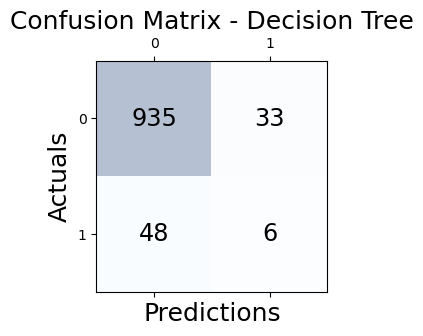

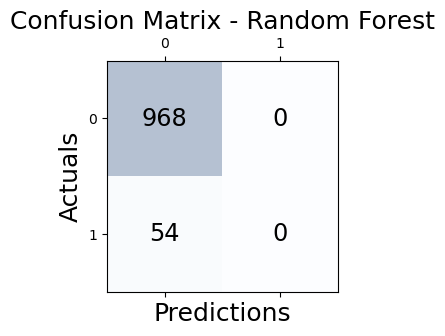

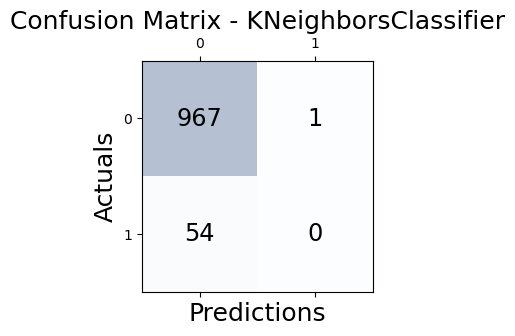

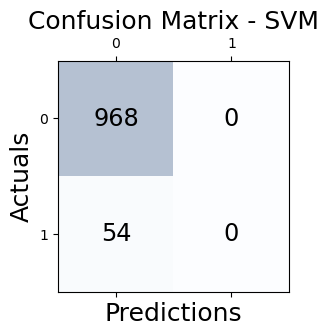

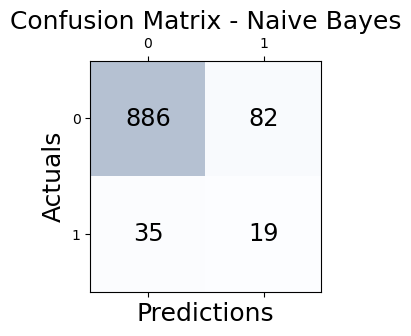

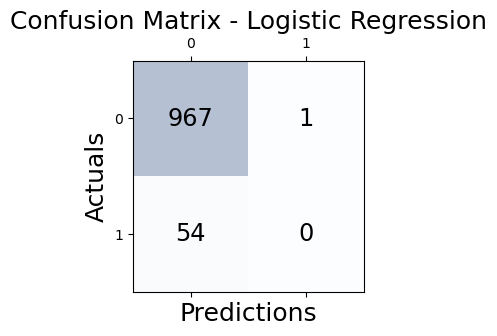

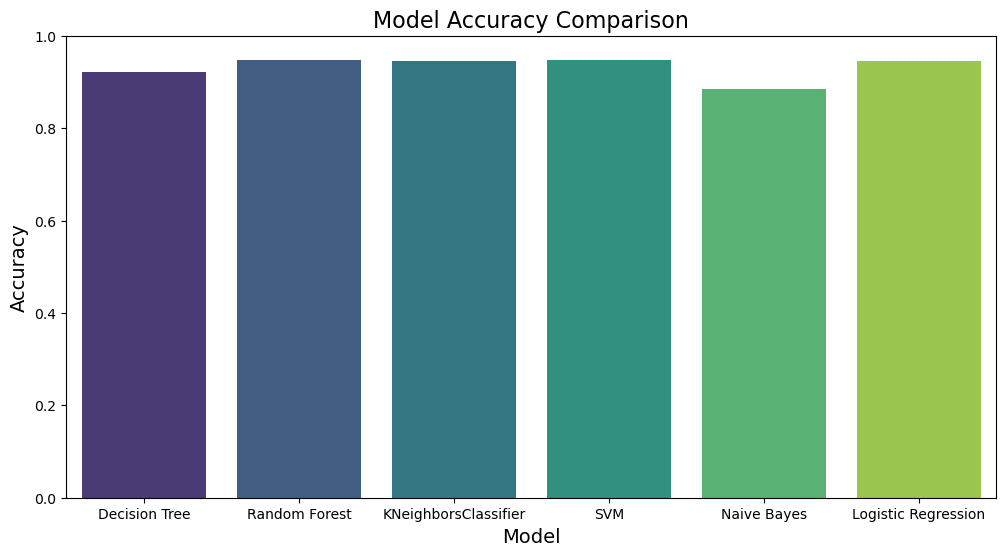

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Instantiate models
models = {
    'Decision Tree': model_decision_classifier,
    'Random Forest': model_randomforest,
    'KNeighborsClassifier': model_knnclassfier,
    'SVM': model_svm,
    'Naive Bayes': model_NB_classifier,
    'Logistic Regression': model_logistic  # Added Logistic Regression to the models
}

def calculate_accuracy_confusion_matrix(model, X_test, y_test, model_name):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, model.predict(X_test))
    
    # Append to accuracy_scores
    accuracy_scores = pd.DataFrame({'Model': model_name, 'Accuracy': accuracy}, index=[0])
    
    # Calculate confusion matrix
    confusionmatrix = confusion_matrix(y_test, model.predict(X_test))
    
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i, s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=18)
    
    # Show confusion matrix plot
    plt.show()

    return accuracy_scores

# Calculate and store accuracy for each model
all_accuracy_scores = pd.DataFrame(columns=['Model', 'Accuracy'])
for model_name, model in models.items():
    accuracy_scores = calculate_accuracy_confusion_matrix(model, independent_variables_test, dependent_variable_test, model_name)
    all_accuracy_scores = pd.concat([all_accuracy_scores, accuracy_scores], ignore_index=True)

# Create a bar plot for accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=all_accuracy_scores, palette="viridis")
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.show()

In [56]:
all_accuracy_scores

Model  Accuracy
0         Decision Tree  0.920744
1         Random Forest  0.947162
2  KNeighborsClassifier  0.946184
3                   SVM  0.947162
4           Naive Bayes  0.885519
5   Logistic Regression  0.946184